# **Machine Learning Pipeline**

* Arsalan Ali
* arslanchaos@gmail.com

* **1. Problem**
* **2. Data Preparing**
    * 2.1 Analyze Data
    * 2.2 Descriptive Statitics
    * 2.3 Data Visualization
* **3. Outliers investigation**
    * 3.1 Single Feature Outlier Investigation
    * 3.2 Pairwise Outliers investigation
* **4. Feature Engineering**
    * 4.1 Remove Outliers
    * 4.2 Data Preprocessig
       * 4.2.1 Standard Scaler
       * 4.2.2 MinMax Scaler
* **5. Feature Selection**
    * 5.1 Corrolation
    * 5.2 Feature Importance
* **6. Model Algorithms: Baseline**
* **7. Algorithm Tuning**
    * 7.1 Random Search
    * 7.2 Grid Search
* **8. Ensemble Methods**
    * 8.1 Voting Ensemble
    * 8.2 Error Correlation
    * 8.3 Stacking
* **9. Deploying Machine Learning Models**
* **10. Monitoring ML Models**

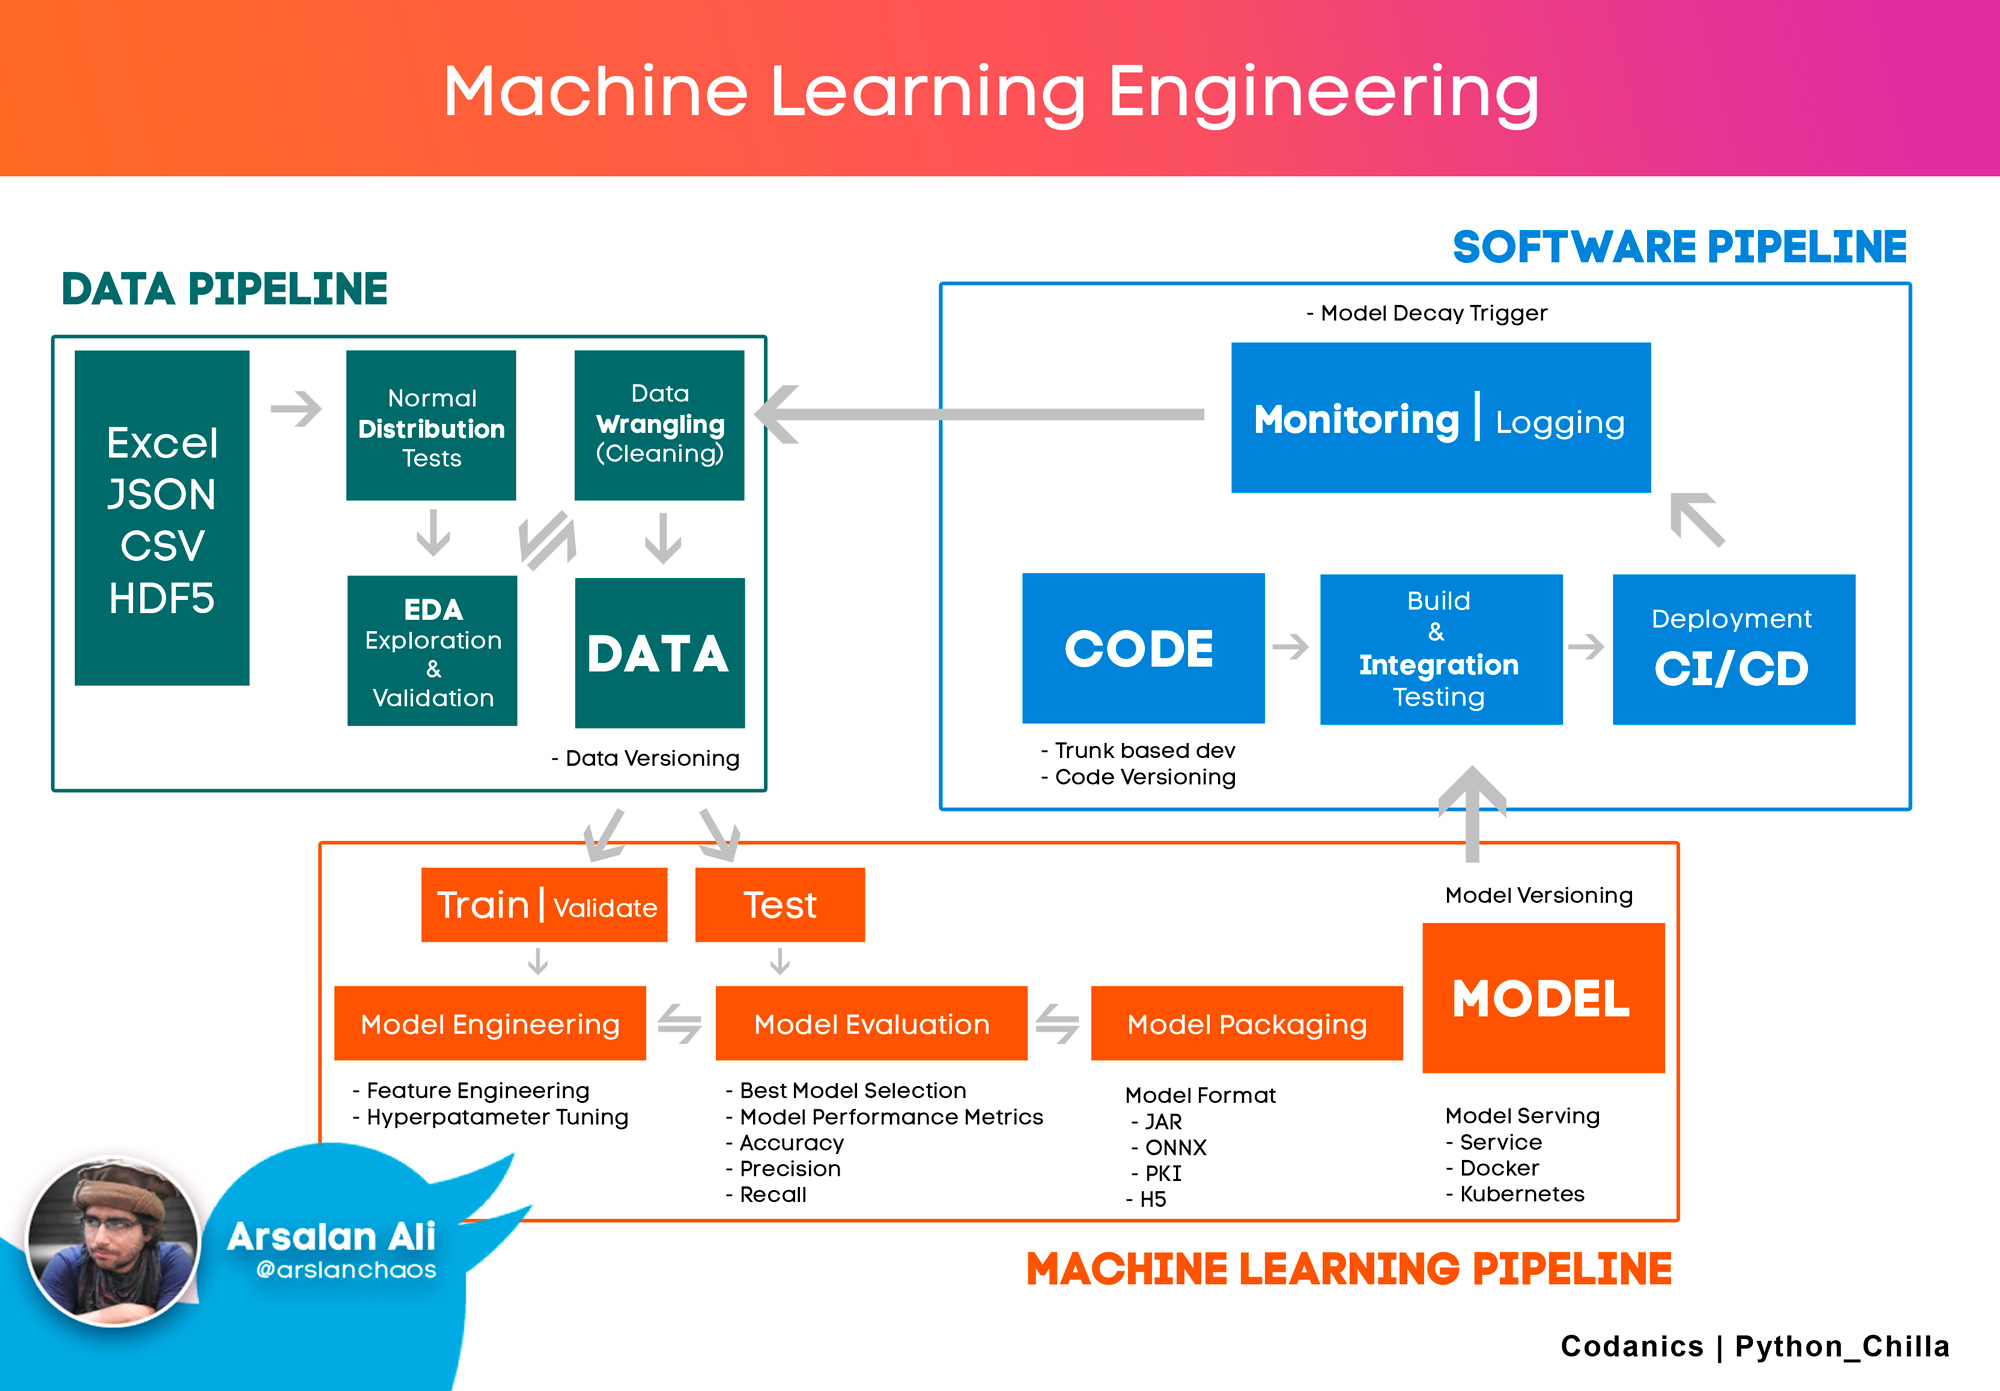

In [108]:
from IPython.display import Image
Image(filename='mle.jpg', width=1200)

## **1. Problem**
### Prima Indians Diabetes Database
#### Predict the onset of diabetes based on diagnoistic measures

* In this project, a classification model will be made using the Pima Indians Diabetes data set. Diabetes is a group of metabolic disorders in which long-term high blood sugar levels are seen. High blood sugar symptoms include frequent urination, increased thirst, and increased hunger. If left untreated, diabetes can cause many complications. Acute complications may include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcer, and eye damage.

* This dataset was originally from the National Institute of Diabetes, Digestive and Kidney Diseases. The purpose of the dataset is to diagnostically predict whether a patient has diabetes based on the specific diagnostic measures included in the data set. Various restrictions have been imposed on the selection of these samples from a larger database.

* About this data, all the patients here are women who are at least 21 years old of Pima Indian heritage. The data set consists of 768 observation units and 9 variables. These variables are; pregnancy, glucose, blood pressure, skin thickness, insulin, body mass index, diabetes pedigree, age and outcome. After the exploratory data analysis on the data set is completed, the machine learning model will be set up. For this, supervised learning algorithms will be used.

**Attribute Information:**
* 1- **Pregnancies:**  Number of times pregnant
* 2- **Glucose:**  2 hours Plasma glucose concentration in an oral glucose tolerance test
* 3- **BloodPressure:**  Diastolic blood pressure (mm Hg)
* 4- **SkinThickness:**  Triceps skin fold thickness (mm)
* 5- **Insulin:**  2-Hour serum insulin (mu U/ml)
* 6- **BMI:**  Body mass index (weight in kg/(height in m)^2)
* 7- **DiabetesPedigreeFunction:**  A function that determines the risk of type 2 diabetes based on family history, the larger the function, the higher the risk of type 2 diabetes.
* 8- **Age:**  Age (years)
* 9- **Outcome:**  Class variable. Whether the person is diagnosed with type 2 diabetes (1 = yes, 0 = no).

## **2. Data Preparation**

In [1]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [2]:
# REPRODUCIBILITY: Always set your seed in order to reproduce results 
SEED = 10
np.random.seed(SEED)

In [3]:
# DATA PREPARATION
df = pd.read_csv("diabetes.csv")

# Column names
df_name = df.columns

### **2.1 Analyze Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### **2.2 Descriptive Statistics**

In [8]:
np.round(df.describe(),1)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
count        768.0    768.0          768.0          768.0    768.0  768.0   
mean           3.8    120.9           69.1           20.5     79.8   32.0   
std            3.4     32.0           19.4           16.0    115.2    7.9   
min            0.0      0.0            0.0            0.0      0.0    0.0   
25%            1.0     99.0           62.0            0.0      0.0   27.3   
50%            3.0    117.0           72.0           23.0     30.5   32.0   
75%            6.0    140.2           80.0           32.0    127.2   36.6   
max           17.0    199.0          122.0           99.0    846.0   67.1   

       DiabetesPedigreeFunction    Age  Outcome  
count                     768.0  768.0    768.0  
mean                        0.5   33.2      0.3  
std                         0.3   11.8      0.5  
min                         0.1   21.0      0.0  
25%                         0.2   24.0      0.0  
50%                         0.4   29.0      0.0  
75%                         0.6   41.0      1.0  
max                         2.4   81.0      1.0

### **2.3. Data Visualization**
Visualizing raw data can give us a better sense of what we're dealing with<br>
Scatterplots are preffered here.

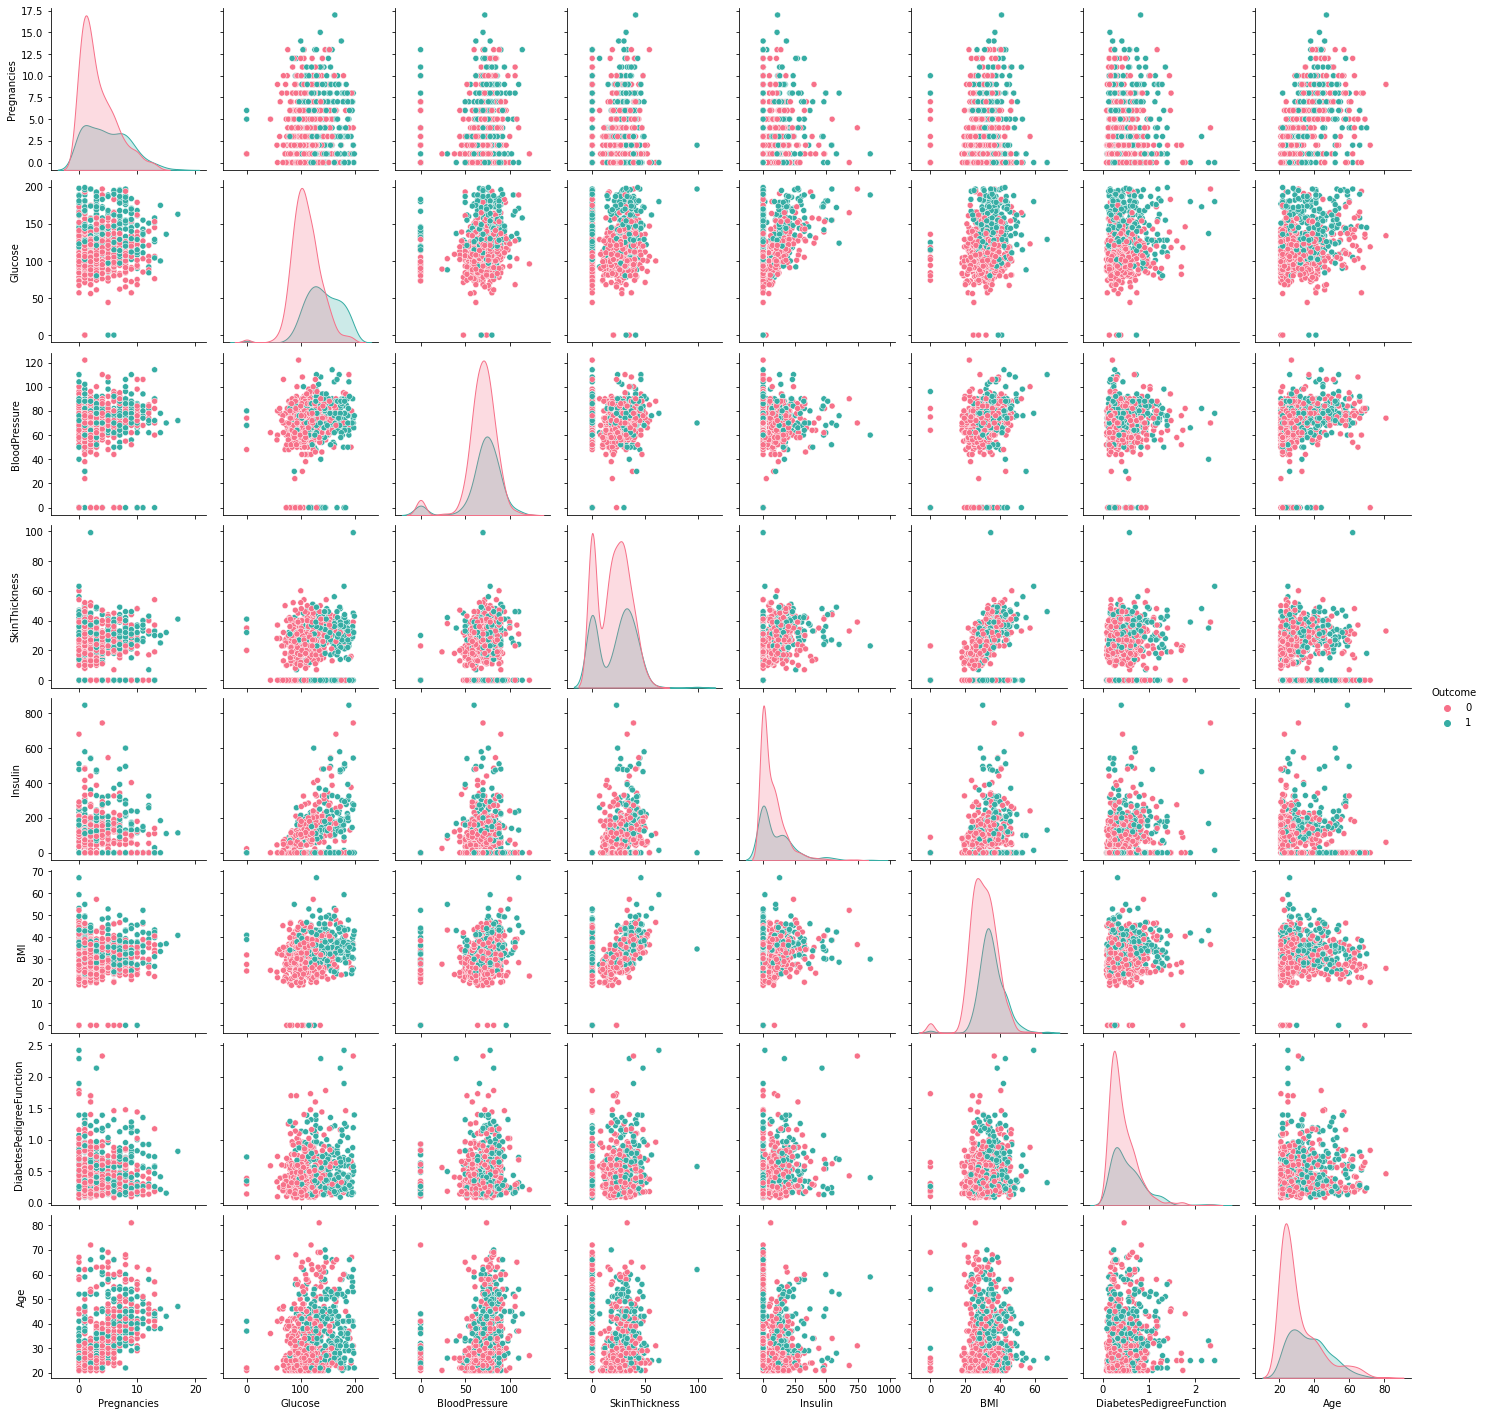

In [9]:
g = sns.pairplot(df, hue="Outcome", palette="husl")

**There are a lot of outliers in the dataset**<br>
Lets check pregnancy distribution

In [10]:
fig = px.histogram(df, x="Pregnancies")
fig.show()

17 times pregnancy is a little bite strange! Is it outlier ?

Let's investagate each fearure distribution.

A fundamental task in many statistical analyses is to characterize the location and variability of a data set. A further characterization of the data includes **skewness and kurtosis.**

**Skewness** is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.A general guideline for skewness is that if the number is **greater than +1 or lower than –1**, this is an indication of a substantially skewed distribution.

**Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case. For kurtosis, the general guideline is that if the number is **greater than +1, the distribution is too peaked. Likewise, a kurtosis of less than –1 indicates a distribution that is too flat.**

In [50]:
from scipy.stats import skew
from scipy.stats import kurtosis

def plotBarCat(df, feature, target):
    
    x0 = df[df[target]==0][feature]
    x1 = df[df[target]==1][feature]

    trace_1 = go.Histogram(
        x = x0,
        opacity = 0.80
    )

    trace_2 = go.Histogram(
        x = x1,
        opacity = 0.80
    )

    data = [trace_1, trace_2]
    layout = go.Layout(barmode = "overlay",
                        title = feature,
                        yaxis = dict(title="Count")
                        )

    fig = go.Figure(data = data, layout = layout)
    py.iplot(fig, filename = "overlaid histogram")

    def DescribeFloatSkewKurt(df,target):
        print('-_-'*30)
        print(f"{target} MEAN : {np.mean(df[feature]):.4}")
        print(f"{target} VAR : {np.var(df[feature]):.4}")
        print(f"{target} SKEW (0 for normal) : {skew(df[feature]):.3}")
        print(f"{target} KURTOSIS (0 for normal) : {kurtosis(df[feature]):.3}")
        print('-_-'*30)
    
    DescribeFloatSkewKurt(df,feature)

In [58]:
for index, name in enumerate(df_name):
    plotBarCat(df,df_name[index],'Outcome')

-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
Pregnancies MEAN : 3.845
Pregnancies VAR : 11.34
Pregnancies SKEW (0 for normal) : 0.9
Pregnancies KURTOSIS (0 for normal) : 0.15
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-


-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
Glucose MEAN : 120.9
Glucose VAR : 1.021e+03
Glucose SKEW (0 for normal) : 0.173
Glucose KURTOSIS (0 for normal) : 0.629
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-


-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
BloodPressure MEAN : 69.11
BloodPressure VAR : 374.2
BloodPressure SKEW (0 for normal) : -1.84
BloodPressure KURTOSIS (0 for normal) : 5.14
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-


-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
SkinThickness MEAN : 20.54
SkinThickness VAR : 254.1
SkinThickness SKEW (0 for normal) : 0.109
SkinThickness KURTOSIS (0 for normal) : -0.524
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-


-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
Insulin MEAN : 79.8
Insulin VAR : 1.326e+04
Insulin SKEW (0 for normal) : 2.27
Insulin KURTOSIS (0 for normal) : 7.16
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-


-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
BMI MEAN : 31.99
BMI VAR : 62.08
BMI SKEW (0 for normal) : -0.428
BMI KURTOSIS (0 for normal) : 3.26
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-


-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
DiabetesPedigreeFunction MEAN : 0.4719
DiabetesPedigreeFunction VAR : 0.1096
DiabetesPedigreeFunction SKEW (0 for normal) : 1.92
DiabetesPedigreeFunction KURTOSIS (0 for normal) : 5.55
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-


-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
Age MEAN : 33.24
Age VAR : 138.1
Age SKEW (0 for normal) : 1.13
Age KURTOSIS (0 for normal) : 0.631
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-


-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-
Outcome MEAN : 0.349
Outcome VAR : 0.2272
Outcome SKEW (0 for normal) : 0.634
Outcome KURTOSIS (0 for normal) : -1.6
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-


In [80]:
def PlotPie(df, nameOfFeature):
    labels = [str(df[nameOfFeature].unique()[i]) for i in range(df[nameOfFeature].nunique())]
    values = [df[nameOfFeature].value_counts()[i] for i in range(df[nameOfFeature].nunique())]

    trace=go.Pie(labels=labels,values=values)

    py.iplot([trace])

In [81]:
PlotPie(df, 'Outcome')

**This is an example of imbalanced classes**
since the outcome 1 is 65% and outcome 0 is almost 35%

## **3. Outliers Investigation**

### **3.1 Single Feature Outlier Investigation**

In [82]:
def OutLiersBox(df,nameOfFeature):
    
    trace_0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace_1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace_2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace_3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace_0,trace_1,trace_2,trace_3]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")

In [83]:
for index,name in enumerate(df_name):
    OutLiersBox(df,df_name[index])

### **3.2 Pairwise Outliers investigation**

In [124]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

def OutLierDetection(df,feature1,feature2,outliers_fraction=.1):
    
    new_df = df.copy()
    rng = np.random.RandomState(42)

    # Example settings
    n_samples = new_df.shape[0]
#     outliers_fraction = 0.2 # ************************************** imp
    clusters_separation = [0]#, 1, 2]

    # define two outlier detection tools to be compared
    classifiers = {
        "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                         kernel="rbf", gamma=0.1),
        "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
        "Isolation Forest": IsolationForest(max_samples=n_samples,
                                            contamination=outliers_fraction,
                                            random_state=rng),
        "Local Outlier Factor": LocalOutlierFactor(
            n_neighbors=35,
            contamination=outliers_fraction)}

    
    xx, yy = np.meshgrid(np.linspace(new_df[feature1].min()-new_df[feature1].min()*10/100, 
                                     new_df[feature1].max()+new_df[feature1].max()*10/100, 50),
                         np.linspace(new_df[feature2].min()-new_df[feature2].min()*10/100,
                                     new_df[feature2].max()+new_df[feature2].max()*10/100, 50))


    n_inliers = int((1. - outliers_fraction) * n_samples)
    n_outliers = int(outliers_fraction * n_samples)
    ground_truth = np.ones(n_samples, dtype=int)
    ground_truth[-n_outliers:] = -1

    # Fit the problem with varying cluster separation
    for i, offset in enumerate(clusters_separation):
        np.random.seed(42)
        # Data generation

        X = new_df[[feature1,feature2]].values.tolist()

        # Fit the model
        plt.figure(figsize=(9, 7))
        for i, (clf_name, clf) in enumerate(classifiers.items()):
            # fit the data and tag outliers
            if clf_name == "Local Outlier Factor":
                y_pred = clf.fit_predict(X)
                scores_pred = clf.negative_outlier_factor_
            else:
                clf.fit(X)
                scores_pred = clf.decision_function(X)
                y_pred = clf.predict(X)
            threshold = stats.scoreatpercentile(scores_pred,
                                                100 * outliers_fraction)
            n_errors = (y_pred != ground_truth).sum()
            
            unique, counts = np.unique(y_pred,return_counts=True)
            print(clf_name,dict(zip(unique, counts)))
            
            new_df[feature1+'_'+feature2+clf_name] = y_pred
#             print(clf_name,y_pred) 
            # plot the levels lines and the points
            if clf_name == "Local Outlier Factor":
                # decision_function is private for LOF
                Z = clf.negative_outlier_factor_(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            subplot = plt.subplot(2, 2, i + 1)
            subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                             cmap=plt.cm.Blues_r)
            a = subplot.contour(xx, yy, Z, levels=[threshold],
                                linewidths=2, colors='red')
            subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                             colors='orange')
            b = plt.scatter(new_df[feature1], new_df[feature2], c='white',
                     s=20, edgecolor='k')

            subplot.axis('tight')

            subplot.set_xlabel("%s" % (feature1))
 
            plt.ylabel(feature2)#, fontsize=18)
            plt.title("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))

        plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
#         plt.suptitle("Outlier detection")

    plt.show()
    return new_df

One-Class SVM {-1: 197, 1: 571}
Robust covariance {-1: 77, 1: 691}
Isolation Forest {-1: 77, 1: 691}
Local Outlier Factor {-1: 77, 1: 691}


TypeError: 'numpy.ndarray' object is not callable

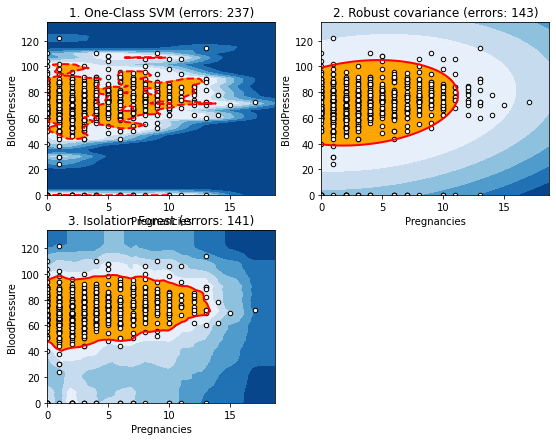

In [125]:
tt = OutLierDetection(df,'Pregnancies','BloodPressure',.1)

## **4. Feature Engineering**

### **4.1 Remove Outliers**

In [161]:
def RemoveOutliers(df_out,nameOfFeature,drop=False):

    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]


    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and the outliers are: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features ".format(*good_data.shape))
        return good_data
    else: 
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out

#### Feature 0

In [162]:
feature_number = 0
OutLiersBox(df,df_name[feature_number])

In [163]:
df_clean = RemoveOutliers(df,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 4 and the outliers are: [15 17 14 14]
New dataset with removed outliers has 764 samples with 9 features 


#### Feature 1

In [164]:
feature_number = 1
OutLiersBox(df,df_name[feature_number])

In [165]:
df_clean = RemoveOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 5 and the outliers are: [0 0 0 0 0]
New dataset with removed outliers has 759 samples with 9 features 


#### Feature 2

In [166]:
feature_number = 2
OutLiersBox(df,df_name[feature_number])

In [167]:
df_clean = RemoveOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 45 and the outliers are: [  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]
New dataset with removed outliers has 714 samples with 9 features 


#### Feature 3

In [168]:
feature_number = 3
OutLiersBox(df,df_name[feature_number])

In [169]:
df_clean = RemoveOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 1 and the outliers are: [99]
New dataset with removed outliers has 713 samples with 9 features 


#### Feature 4

In [170]:
feature_number = 4
OutLiersBox(df,df_name[feature_number])

In [171]:
df_clean = RemoveOutliers(df_clean,df_name[4],True)
OutLiersBox(df_clean,df_name[4])

Number of outliers (inc duplicates): 27 and the outliers are: [543 846 342 495 485 495 478 744 370 680 402 375 545 360 465 415 579 474
 480 600 440 540 480 335 387 392 510]
New dataset with removed outliers has 686 samples with 9 features 


#### Feature 5

In [172]:
feature_number = 5
OutLiersBox(df,df_name[feature_number])

In [173]:
df_clean = RemoveOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 10 and the outliers are: [ 0.  49.7 53.2  0.  50.  52.9  0.  59.4 57.3  0. ]
New dataset with removed outliers has 676 samples with 9 features 


#### Feature 6

In [174]:
feature_number = 6
OutLiersBox(df,df_name[feature_number])

In [175]:
df_clean = RemoveOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 29 and the outliers are: [2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.189 1.321 1.224 1.318 1.213
 1.353 1.224 1.391 1.476 1.268 1.6   1.191 1.251 1.699 1.258 1.282 1.698
 1.461 1.292 1.394 1.174 1.182]
New dataset with removed outliers has 647 samples with 9 features 


#### Feature 7

In [176]:
feature_number = 7
OutLiersBox(df,df_name[feature_number])

In [177]:
df_clean = RemoveOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 11 and the outliers are: [69 66 67 81 67 66 67 66 70 68 66]
New dataset with removed outliers has 636 samples with 9 features 


#### Cleaning Report

In [178]:
print('df shape: {}, new df shape: {}, we lost {} rows, {}% of our data'.format(df.shape[0],df_clean.shape[0],
                                                              df.shape[0]-df_clean.shape[0],
                                                        (df.shape[0]-df_clean.shape[0])/df.shape[0]*100))

df shape: 768, new df shape: 636, we lost 132 rows, 17.1875% of our data


One-Class SVM {-1: 145, 1: 491}
Robust covariance {-1: 64, 1: 572}
Isolation Forest {-1: 64, 1: 572}
Local Outlier Factor {-1: 64, 1: 572}


TypeError: 'numpy.ndarray' object is not callable

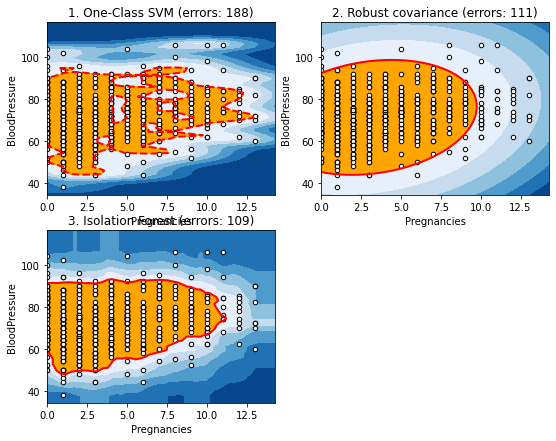

In [179]:
tt_t = OutLierDetection(df_clean,'Pregnancies','BloodPressure',.1)

### **4.2 Data Preprocessig**

Numerical features Pre-Processing is different for tree-based and non-tree-based models.

1) **Note:**

* Tree based models does not depend on scaling
* Non-tree based models hugely depend on scaling
* **Feature Scaling consists of Standardization and Normalization**

2) **Generally used Pre-Processing Methods:**

* **Standardization:** Scales to Normal Distribution MEAN(0) and STD(1)
    * Standard Scaler (Z-score)
    * Robust Scaler
    * Quantile Transformer
    * Log Scaling
    * Power Transformer Scaler
    * Log Scaling
* **Normalization:** Scales to Ranges from [0,1] or [-1,1]
    * Min-Max Scaler
    * Max-Abs Scaler
    * Unit Vector Normalizer
    * Clipping

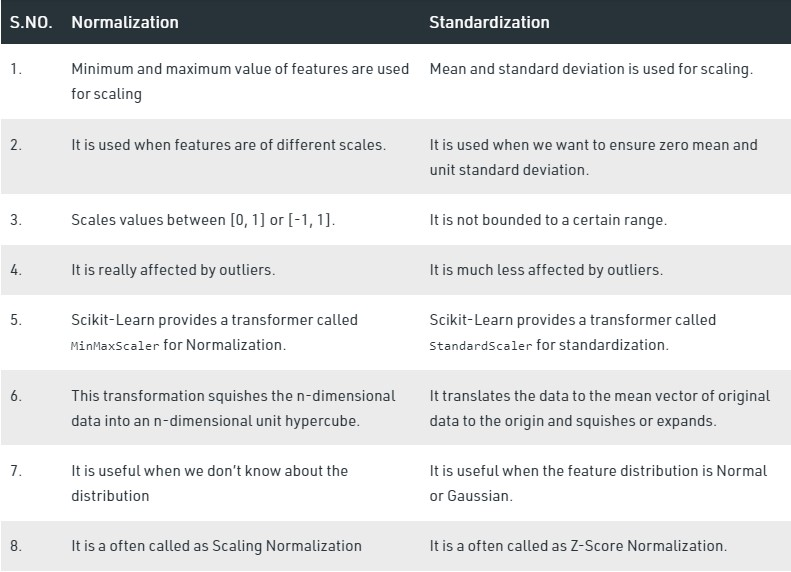

In [187]:
Image(filename='Feature_scaling.jpg')

#### **4.1 Standard Scaler (Standardization)**

In [157]:
from sklearn.preprocessing import StandardScaler

# Standard Scalar based of Mean
scaler = StandardScaler()
data = scaler.fit_transform(df_clean)
df_scaled = pd.DataFrame(data, columns = df_name)
df_scaled

#### **4.2 Min-Max Scaler (Normalization)**

In [188]:
from sklearn.preprocessing import MinMaxScaler

# MinMax Scalar based on 0 - 1 range
trans = MinMaxScaler()
data = trans.fit_transform(df_clean)
df_scaled = pd.DataFrame(data, columns = df_name)
df_scaled

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.461538  0.675325       0.500000       0.583333  0.000000  0.490446   
1       0.076923  0.266234       0.411765       0.483333  0.000000  0.267516   
2       0.615385  0.902597       0.382353       0.000000  0.000000  0.162420   
3       0.076923  0.292208       0.411765       0.383333  0.284848  0.315287   
4       0.384615  0.467532       0.529412       0.000000  0.000000  0.235669   
..           ...       ...            ...            ...       ...       ...   
631     0.769231  0.370130       0.558824       0.800000  0.545455  0.468153   
632     0.153846  0.506494       0.470588       0.450000  0.000000  0.592357   
633     0.384615  0.500000       0.500000       0.383333  0.339394  0.254777   
634     0.076923  0.532468       0.323529       0.000000  0.000000  0.378981   
635     0.076923  0.318182       0.470588       0.516667  0.000000  0.388535   

     DiabetesPedigreeFunction       Age  Outcome  
0                    0.506458  0.659091      1.0  
1                    0.251845  0.227273      0.0  
2                    0.547970  0.250000      1.0  
3                    0.082103  0.000000      0.0  
4                    0.113469  0.204545      0.0  
..                        ...       ...      ...  
631                  0.085793  0.954545      0.0  
632                  0.241697  0.136364      0.0  
633                  0.154059  0.204545      0.0  
634                  0.250000  0.590909      1.0  
635                  0.218635  0.045455      0.0  

[636 rows x 9 columns]

## **5. Feature Selection**

Feature selection is also called variable selection or attribute selection. It is the automatic selection of attributes in your data (such as columns in tabular data) that are most relevant to the predictive modeling problem you are working on.

Feature selection methods aid you in your mission to create an accurate predictive model. They help you by choosing features that will give you as good or better accuracy whilst requiring less data.

Feature selection methods can be used to identify and remove unneeded, irrelevant and redundant attributes from data that do not contribute to the accuracy of a predictive model or may in fact decrease the accuracy of the model.

### **5.1 Correlation**
If we fit highly correlated data in our model, it results in the overfitting probelm. Thus, for example if there are two highly corrolated features we have to drop the one that has more correlation with other feature.

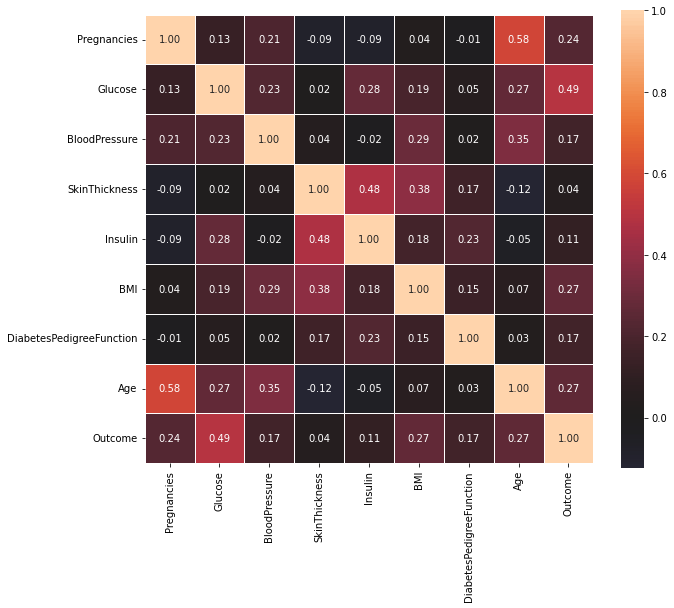

In [190]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

HeatMap(df_clean,x=True)

No highly positive correlated features found.

### **5.2 Feature Importance**
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

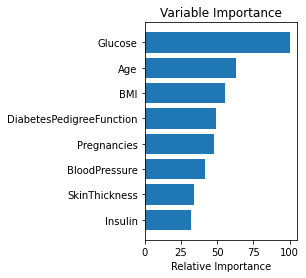

In [191]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=SEED)

clf.fit(df_clean[df_name[0:8]],df_clean[df_name[8]])

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [192]:
df_feature_imp = df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
df_feature_imp_name = df_feature_imp.columns

## **6. Model Algorithms: Baseline**

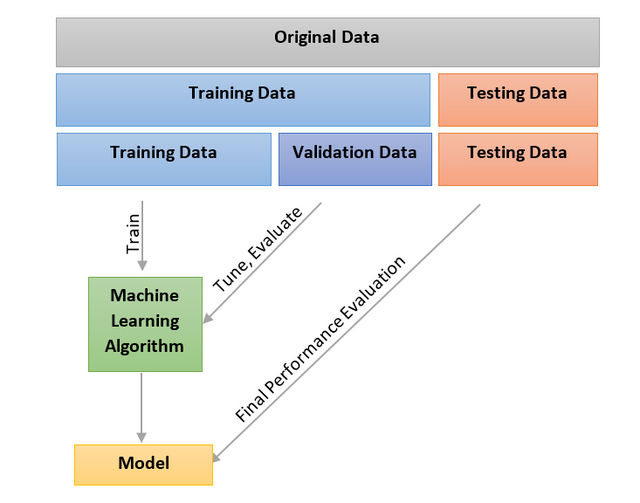

In [110]:
Image(filename = "ML_Base.png")

* We usually divide the data into train and test set. We will not touch test set until the end of the computation and the final perpormance evaluation.<br>
Then, we divide the train set into train and validation sets. We use the validation data set for hyper-parameter tuning.

* Traditional train-test method suffer from high variance test problem. It means that by changing the test set the result of the prediction changes.<br>
To over come this problem we use k-fold validation method in our train and validation set.

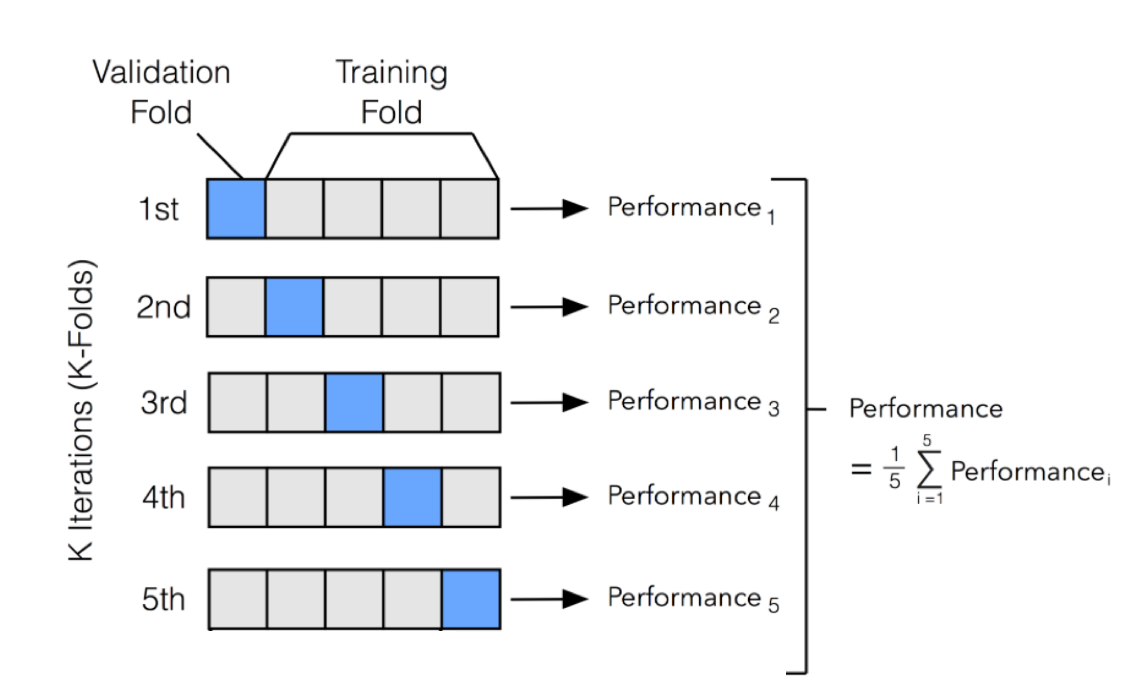

In [111]:
Image(filename='kfolds.png')

In [198]:
# Import libraries

from pandas import set_option
# from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [193]:
df_feature_imp.head()

Glucose   BMI  Age  DiabetesPedigreeFunction  Outcome
0      148  33.6   50                     0.627        1
1       85  26.6   31                     0.351        0
2      183  23.3   32                     0.672        1
3       89  28.1   21                     0.167        0
4      116  25.6   30                     0.201        0

In [199]:
df_feature_imp = df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
df_feature_imp_name = df_feature_imp.columns

X = df_feature_imp.drop(['Outcome'], axis = 1).values
y = df_feature_imp['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df_feature_imp['Outcome'])

In [210]:
# Initial Algorithms to fit the data on
def GetBasedModel():
    basedModels = []
    basedModels.append(('Logistic Regression', LogisticRegression()))
    basedModels.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
    basedModels.append(('K-Nearest Neigbour', KNeighborsClassifier()))
    basedModels.append(('Decision Tree', DecisionTreeClassifier()))
    basedModels.append(('Naive Bayes', GaussianNB()))
    basedModels.append(('Support Vector Machine', SVC(probability=True)))
    basedModels.append(('Ada Boost', AdaBoostClassifier()))
    basedModels.append(('Gradient Boost'  , GradientBoostingClassifier()))
    basedModels.append(('Random Forest'   , RandomForestClassifier()))
    basedModels.append(('Extra Tree Classifier'   , ExtraTreesClassifier()))

    
    return basedModels

In [217]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print(f"{name} {cv_results.mean():.3f} [{cv_results.std():.3f}]")
        
    return names, results

In [218]:
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)

In [219]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train, models)
PlotBoxR().PlotResult(names,results)

Logistic Regression 0.788 [0.041]
Linear Discriminant Analysis 0.786 [0.042]
K-Nearest Neigbour 0.778 [0.042]
Decision Tree 0.704 [0.038]
Naive Bayes 0.784 [0.028]
Support Vector Machine 0.780 [0.031]
Ada Boost 0.773 [0.044]
Gradient Boost 0.782 [0.034]
Random Forest 0.757 [0.032]
Extra Tree Classifier 0.748 [0.036]


In [220]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [221]:
basedLineScore = ScoreDataFrame(names,results).sort_values(by="Score", ascending=False)
basedLineScore

Model   Score
0           Logistic Regression  0.7883
1  Linear Discriminant Analysis  0.7863
4                   Naive Bayes  0.7841
7                Gradient Boost  0.7820
5        Support Vector Machine  0.7799
2            K-Nearest Neigbour  0.7776
6                     Ada Boost  0.7735
8                 Random Forest  0.7569
9         Extra Tree Classifier  0.7482
3                 Decision Tree  0.7043

## **7. Algorithm Tuning**

In [223]:
X = df_feature_imp.drop(['Outcome'], axis = 1).values
y = df_feature_imp['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_feature_imp['Outcome'])

In [224]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

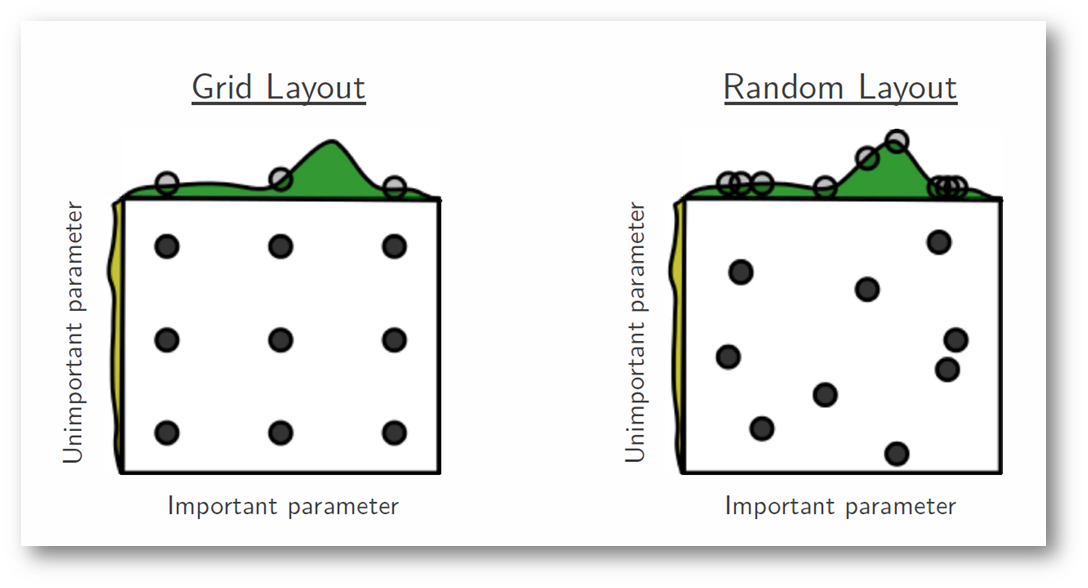

In [226]:
Image(filename='algo_tuning.png')

### **7.1 Random Search**

In [227]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

#### **7.2 Grid Search**

In [228]:
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

#### **Logistic Regression**
**Hyperparameters:**
* **solver:** For useful differences in performance or convergence with different solvers
* **penalty:** It is Regularization type, it can be either "L2" or “L1”. Default is “L2”.
* **C:** Its Regularization value, the more, the stronger the regularization(double)
* **List of All:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [229]:
# model
model = LogisticRegression()

# Create solver types
solvers = ['newton-cg', 'lbfgs', 'liblinear']

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(solver=solvers, penalty=penalty, C=C)

In [231]:
LR_RandSearch = RandomSearch(X_train, y_train, model, hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test)

import warnings
warnings.filterwarnings('ignore')

Best: 0.788687 using {'C': 2.9926626175193576, 'penalty': 'l2', 'solver': 'liblinear'}


c:\Users\Arsla\.conda\envs\experiments\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


370 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Arsla\.conda\envs\experiments\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Arsla\.conda\envs\experiments\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\Arsla\.conda\envs\experiments\lib\site-packages\sklearn\linear_model\_logist

In [237]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix

def run_experiment(model):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    plot_confusion_matrix(model, X_test, y_test, cmap='GnBu')
    plt.show()
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    print('Recall: %.3f' % recall_score(y_test, y_pred))
    print('F1: %.3f' % f1_score(y_test, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

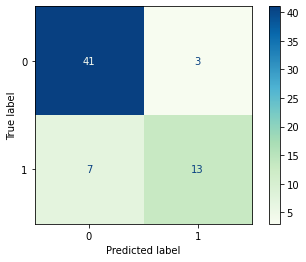

Precision: 0.812
Recall: 0.650
F1: 0.722
Accuracy: 0.844


In [238]:
run_experiment(model)

#### **K-Nearest Neighbour**
**Hyperparameters:**
* **n_neighbors:** Number of neighbors to use by default for k_neighbors queries
* **weights:** Assigns weights to neighbours
* **metric:** The distance metric to use for the tree
* **List of All:** https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [240]:
model_KNN = KNeighborsClassifier()

n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

param_grid = dict(n_neighbors=n_neighbors, weights=weights, metric=metric)

In [241]:
KNN_GridSearch = GridSearch(X_train, y_train, model_KNN, param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test)

Best: 0.778010 using {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


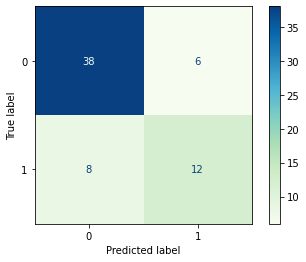

Precision: 0.667
Recall: 0.600
F1: 0.632
Accuracy: 0.781


In [242]:
run_experiment(model_KNN)

#### **Support Vector Machine**
**Hyperparameters:**
* **C:** The Penalty parameter C of the error term.
* **Kernel:** Kernel type could be linear, poly, rbf or sigmoid.
* **List of all:** https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [243]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [244]:
SVC_GridSearch = GridSearch(X_train, y_train, model_SVC,param_grid)
Prediction_SVC = SVC_GridSearch.BestModelPridict(X_test)

Best: 0.783394 using {'C': 0.3, 'kernel': 'linear'}


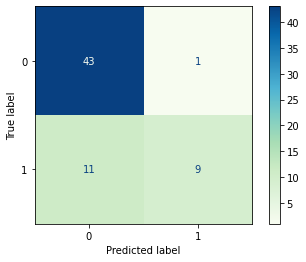

Precision: 0.900
Recall: 0.450
F1: 0.600
Accuracy: 0.812


In [245]:
run_experiment(model_SVC)

#### **Decision Tree**
**Hyperparameters:**
* **max_depth:** Maximum depth of the tree (double).
* **row_subsample:** Proportion of observations to consider (double).
* **max_features:** Proportion of columns (features) to consider in each level (double).
* **List of all:** https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [247]:
from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  randint(1, 4)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]

param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

model_CART = DecisionTreeClassifier()

In [251]:
CART_RandSearch = RandomSearch(X_train,y_train,model_CART,param_grid)
Prediction_CART = CART_RandSearch.BestModelPridict(X_test)

Best: 0.767483 using {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1}


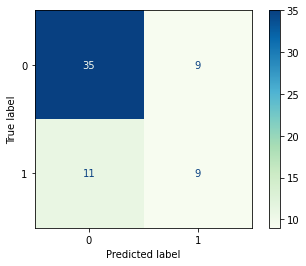

Precision: 0.500
Recall: 0.450
F1: 0.474
Accuracy: 0.688


In [252]:
run_experiment(model_CART)

#### **AdaBoost**
**Hyperparameters:**
* **learning_rate:** Learning rate shrinks the contribution of each classifier by learning_rate.
* **n_estimators:** Number of trees to build.
* **List of all:** https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [253]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

model_Ad = AdaBoostClassifier()

In [254]:
Ad_GridSearch = GridSearch(X_train, y_train, model_Ad, param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(X_test)

Best: 0.800817 using {'learning_rate': 0.05, 'n_estimators': 150}


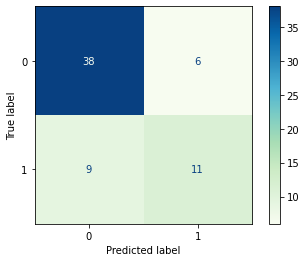

Precision: 0.647
Recall: 0.550
F1: 0.595
Accuracy: 0.766


In [255]:
run_experiment(model_Ad)

#### **Gradient Boosting**
**Hyperparameters:**
* **learning_rate:** Learning rate shrinks the contribution of each classifier by learning_rate.
* **n_estimators:** Number of trees to build.
* **subsample :** The fraction of samples to be used for fitting the individual base learners. 
* **max_depth:** The maximum depth of the individual regression estimators. The
* **List of all:** https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [256]:
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)

model_GB = GradientBoostingClassifier()

In [258]:
GB_GridSearch = GridSearch(X_train, y_train, model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test)

Best: 0.786812 using {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.5}


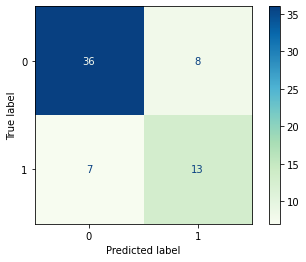

Precision: 0.619
Recall: 0.650
F1: 0.634
Accuracy: 0.766


In [259]:
run_experiment(model_GB)

## **8. Ensemble Methods**

### **8.1 Voting Ensemble**
Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

In [260]:
from sklearn.ensemble import VotingClassifier

In [261]:
param = {'C': 2.9926626175193576, 'penalty': 'l2', 'solver': 'liblinear'}
model1 = LogisticRegression(**param)

param = {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}
model2 = KNeighborsClassifier(**param)

param = {'C': 0.3, 'kernel': 'linear'}
model3 = SVC(**param)

param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 1}
model4 = DecisionTreeClassifier(**param)

param = {'learning_rate': 0.05, 'n_estimators': 150}
model5 = AdaBoostClassifier(**param)

param = {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 1000, 'subsample': 0.5}
model6 = GradientBoostingClassifier(**param)

model7 = GaussianNB()

model8 = RandomForestClassifier()

model9 = ExtraTreesClassifier()

In [262]:
# create the sub models
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('ADa',model5), ('GB',model6),
              ('NB',model7), ('RF',model8),  ('ET',model9)]

In [266]:
# create the ensemble model
kfold = StratifiedKFold(n_splits=10, random_state=SEED, shuffle=True)
ensemble = VotingClassifier(estimators, voting ='hard')
results = cross_val_score(ensemble, X_train, y_train, cv=kfold)
print('Accuracy on train: ',results.mean())
ensemble_model = ensemble.fit(X_train, y_train)
pred = ensemble_model.predict(X_test)
print('Accuracy on test:' , (y_test == pred).mean())

Accuracy on train:  0.7989715668481548
Accuracy on test: 0.828125


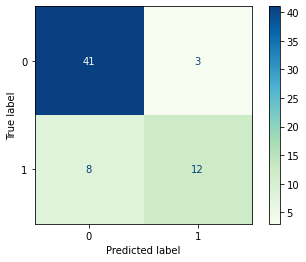

Precision: 0.800
Recall: 0.600
F1: 0.686
Accuracy: 0.828


In [267]:
run_experiment(ensemble_model)

### **8.2 Beyond Voting**

In [272]:
def get_models():

    param = {'C': 0.7678243129497218, 'penalty': 'l2'}
    model1 = LogisticRegression(**param)

    param = {'n_neighbors': 15}
    model2 = KNeighborsClassifier(**param)

    param = {'C': 1.7, 'kernel': 'linear'}
    model3 = SVC(**param, probability=True)

    param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
    model4 = DecisionTreeClassifier(**param)

    param = {'learning_rate': 0.05, 'n_estimators': 150}
    model5 = AdaBoostClassifier(**param)

    param = {'learning_rate': 0.01, 'n_estimators': 100}
    model6 = GradientBoostingClassifier(**param)

    model7 = GaussianNB()

    model8 = RandomForestClassifier()

    model9 = ExtraTreesClassifier()

    models = {'LR':model1, 'KNN':model2, 'SVC':model3,
              'DT':model4, 'ADa':model5, 'GB':model6,
              'NB':model7, 'RF':model8,  'ET':model9
              }

    return models

### **8.2 Error Correlation**

In [273]:
def train_predict(model_list,xtrain, xtest, ytrain, ytest):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P

In [274]:
models = get_models()
P = train_predict(models, X_train, X_test, y_train, y_test)

Fitting models.
LR... done
KNN... done
SVC... done
DT... done
ADa... done
GB... done
NB... done
RF... done
ET... done
Done.



[MLENS] backend: threading


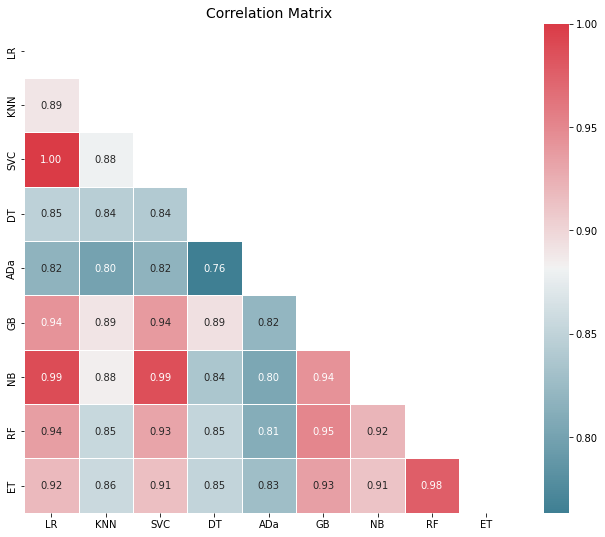

<AxesSubplot:title={'center':'Correlation Matrix'}>

In [276]:
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)

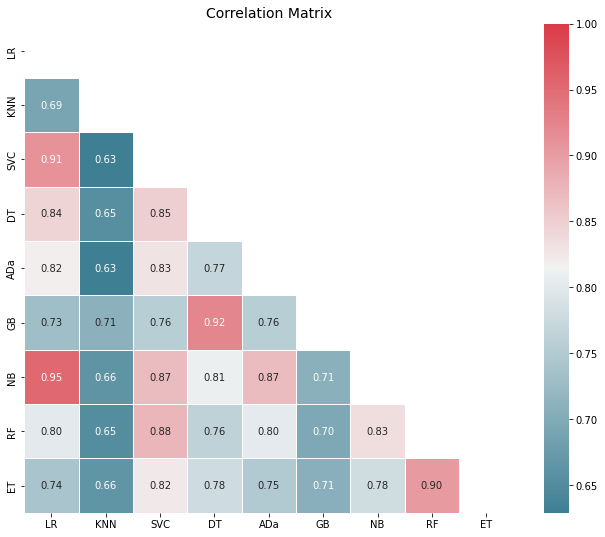

<AxesSubplot:title={'center':'Correlation Matrix'}>

In [277]:
corrmat(P.apply(lambda predic: 1*(predic >= 0.5) - y_test).corr(), inflate=False)

### **8.3 Stacking**

In [278]:
base_learners = get_models()
meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=6,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.001, 
    random_state=SEED
)

from mlens.ensemble import SuperLearner

# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    random_state=SEED,
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(base_learners.values()), proba=True) 
sl.add_meta(meta_learner, proba=True)

# Train the ensemble
sl.fit(X_train, y_train)

# Predict the test set
p_sl = sl.predict_proba(X_test)

# print("\nSuper Learner ROC-AUC score: %.3f" % roc_auc_score(y_test_sc, p_sl[:, 1]))


Fitting 2 layers
Processing layer-1             done | 00:01:20
Processing layer-2             done | 00:00:04
Fit complete                        | 00:01:31

Predicting 2 layers
Processing layer-1             done | 00:00:10
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:12


In [279]:
pp = []
for p in p_sl[:, 1]:
    if p>0.5:
        pp.append(1.)
    else:
        pp.append(0.)

In [280]:
print("\nSuper Learner Accuracy score: %.8f" % (y_test == pp).mean())


Super Learner Accuracy score: 0.85937500


**Other ensembling techniques include:**

* Blending
* Bagging
* Boosting

**Notes:**

* Now you can do more feature engineering
* Tune better
* Use XGBoost, LightGBM, Nueal Network and other boosting method to improve your result
* Stack more diverse model
* Use your creativity

## **9. Deploying machine learning models**

#### Deploying machine learning models into production is the next step of the Machine Learning pipeline.

The Machine Learning model shows its full value when the company that produced it is generating predictions using fully integrated API and feed with real live input data.

Taking an ML Model From Desktop POC to Running in Production Implies a Massive, Continuous Effort.

**Failures of putting the model into productions are one of the most frequent reasons why machine learning projects fail.**

### **9.1 Architecture**
Training machine learning models and putting them into production is relatively easy and cheap. The cost of maintaining them properly into production is much harder. All traditional software maintenance issues remain present in Machine Learning systems.

* There are several types of architectures that serve predictions using a trained model.
* Serving through REST API and online learning are some of them.
* Architecture type depends on the business needs and technical specifications of the platform where the ML module is hosted

### **9.2 Building Reproducible Machine Learning Pipeline**
The machine learning pipeline can be implemented in several ways.

They can be classified into procedural programming using functions for each step in the pipeline, writing our pipeline code using OOP, and using third-party pipeline implementations.

Now, to build a reproducible Machine Learning pipeline means that the results of each step in the pipeline can be reproduced when it is executed again.

The list of the steps executed to build a machine learning project are:

* Collecting data
* Data analysis (which features are categorical and which are continues)
* Feature engineering
* Feature selection
* Training the machine learning model, and
* Model deployment

To ensure the reproducibility of the whole pipeline, we need to ensure it in all the steps. We can exclude step 2, which is done once in the experimental phase.

**One of the biggest challenges in the building models with reproducible results is to reproduce the data collection phase when we extract training data.**

### **9.3 Testing the Machine Learning Pipeline**
An essential part of machine learning pipeline implementation is testing it.

Industry-standard for testing Python code is pytest library. A useful extension to pytest is tox tool. It is a Python virtual environment manager that allows us to execute tests in different Python setups.

### **9.4 Implementing Differential Tests**
* They perform a comparison in the performances of the previous model version and the new one, having the same input starting with training data and including predictions for the same feature values.
* We can implement them using pytest library as a built-in feature.

### **9.5 Testing New Models Before Releasing Into Production**
* New releases of trained Machine Learning models in the production environment should be tested for an extended period (a few months!), before putting it officially into production.
* Also known as **Shadow Deployment** or Dark Launch (named by Google)

* There are two possibilities to implement Shadow Deployments:
    * Application level
    * Infrastructure level

### **9.6 Dealing With Randomness in Machine Learning Pipeline**

In [ ]:
# Example for reproducible randomness with numpy
from numpy.random import seed
seed(0)

#  TensorFlow
from tensorflow import set_random_seed
set_random_seed(0)

#  PyTorch
import torch
torch.manual_seed(0)

#  PyTorch # CUDA and cuDNN modules
SEED = 0
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

### **9.7 Serving the model with REST API**
* REST API is the most frequently used way to expose the trained model that generates predictions.

* Many Python libraries that help in exposing endpoints that generate predictions.

### **9.8 Deployment Methods**
* Generally speaking, the preferred method for serving Machine Learning models is via Docker images.

* They are easy to be versioned, deployed, and orchestrated through various methods (Swarm, Kubernetes)

#### **9.8.1 Serving Deep Learning Models with Tensorflow Serving and TorchServe**
* **TensorFlow serving:** Exists since TensorFlow version 1 and is a mature product.

* **TorchServe:** Flexible and easy to use tool for serving PyTorch models. Is still in the experimental phase!

#### **9.8.2 Kuberflow**
* The Kubeflow project is dedicated to making deployments of machine learning (ML) workflows on Kubernetes simple, portable and scalable. Our goal is not to recreate other services, but to provide a straightforward way to deploy best-of-breed open-source systems for ML to diverse infrastructures. Anywhere you are running Kubernetes, you should be able to run Kubeflow.

* A new kid on the block! This is a new tool that hasn’t gather public interest yet but is worth to be considered when planning the Machine Learning pipeline and deployments.

## **10. Monitoring your Machine Learning Model**
* Monitoring your model can help you understand how accurate your predictions are over time.
* The relationship between your model and the input data changes
* The distribution of your data changes such that your model is less representative
* Change in measurements and/or user base which changes the underlying meaning of variables
* **Drift:**
    * phenomenon of changes in the statistical properties of your data that causes your predictions to degrade over time. In other words, since data is always changing, drift occurs naturally.
    * Drift is often referred to as concept drift, model drift, or data drift
    * Blindly retraining a model could lead to more costs, time waisted, or even a worse model.
    * By monitoring your model you can be more precise in deciding the best method and time for retraining.

* **Monitor Predictions:**
    * Distribution of predictions
    * Prediction probabilities
    * **NOTE:** If you want to compare distributions, then we are typically looking at statistical tests such as the student’s t-test or the non-parametric Kolmogorov Smirnov.
* **Monitor Input:**
    * Distribution of features
    * Outlier detection
* **Human Monitoring:**
    * If a monitored prediction is way off even though it had a probability of over 90%, then it would be nice if these exceptions are looked over by a human.
* **Shadow Mode:**
    * Shadow mode is a technique where you run production data through a newly trained model without giving the predictions back to the user.
    * Shadow mode allows you to simultaneously run both models while testing the performance of the newer model in a production environment.
